# Feature engineering

In this notebook we cover examples of common feature engineering tasks on both numeric and categorical data. The goal isn't to be exhaustive, but provide you with enough examples that you get the picture. As we will see in future lectures, good feature engineering can significantly improve model performance, but feature engineering, just like machine learning in general, can be "part art, part science". So let's see what we mean by that.

We begin with numeric features. Let's begin by reading some data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

auto = pd.read_csv('../Data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])

auto['cylinders'] = auto['cylinders'].astype('category')
auto.describe()

,mpg,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
auto.isnull().any(axis=0)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car_name        False
dtype: bool

In [83]:
auto.dtypes

mpg                        float64
cylinders                 category
displacement               float64
horsepower                  object
weight                     float64
acceleration               float64
model year                   int64
origin                       int64
car_name                    object
mpg_norm                   float64
displacement_norm          float64
weight_norm                float64
acceleration_norm          float64
mpg_norm_loop              float64
displacement_norm_loop     float64
weight_norm_loop           float64
acceleration_norm_loop     float64
dtype: object

We saw some examples of **feature transformation** functions in the previous lesson. **Feature engineering**, in fact, consists of running similar feature transformations on the data and gradually modifying existing columns and adding new features to the data, with the goal of ending up with features that are more useful to the model than the original features we started with. What makes feature engineering so special is that we apply these transformations with an eye towards making the machine learning easier or more doable. Having good features (what feature engineering is all about) can significantly impact how well we do when we move on to machine learning.

A common type of feature transformation for numeric features is **feature normalization**. Note that **normalization** is a word that means something very different in relational databases than in machine learning, so be careful not to confuse the two. The two most common ways to normalize features is **Z-normalization** and **min-max normalization**:

- **Z-normalization** consists of the following transformation, and results in most of the values for the transformed $x$ being between -2 and 2. 
$$x \rightarrow \dfrac{x - mean(x)}{std(x)}$$
- **min-max normalization** consists of the following transformation, and forces all the values of the transformed $x$ to be between 0 and 1: 
$$x \rightarrow \dfrac{x - min(x)}{max(x) - min(x)}$$

So what is the purpose of normalization? If we only have one feature, normalization doesn't really serve a purpose. Normalization makes sense when we have many features and we want to **put them on the same scale**, which is why normalization is also sometimes called **rescaling** or **standardization**. **Some (but not all) ML algorithms only work properly if the data is normalized, otherwise the features that are on a larger scale will exert undue influence on the model.** So normalization acts as a way of leveling the playing field.

### Exercise (15 minutes)

- Normalize `mpg`, `displacement`, `weight` and `acceleration`. Instead of overwriting the original columns, add the normalized features as new columns and name each column using the column name and a `_norm` suffix. You are free to choose between Z-normalization or min-max normalization.

In [28]:
auto['mpg_norm'] = (auto['mpg'] - auto['mpg'].mean()) / auto['mpg'].std()
auto['displacement_norm'] = (auto['displacement'] - auto['displacement'].mean()) / auto['displacement'].std()
auto['weight_norm'] = (auto['weight'] - auto['weight'].mean()) / auto['weight'].std()
auto['acceleration_norm']=(auto['acceleration'] - auto['acceleration'].mean()) / auto['acceleration'].std()

auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car_name', 'mpg_norm',
       'displacement_norm', 'weight_norm', 'acceleration_norm'],
      dtype='object')

Unless your Python skills are improving by leaps and bounds, you probably normalized the features one at a time. What if we wanted to do it all at once? 

- Write a loop to iterate over the four columns and normalize each. To make it easier, we already put the column names in a list for you.

In [30]:
num_cols = ['mpg', 'displacement', 'weight', 'acceleration']
# your code goes here

for cols in num_cols:
    auto[cols + '_norm_loop'] = (auto[cols] - auto[cols].mean()) / auto[cols].std()
    
auto.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car_name', 'mpg_norm',
       'displacement_norm', 'weight_norm', 'acceleration_norm',
       'mpg_norm_loop', 'displacement_norm_loop', 'weight_norm_loop',
       'acceleration_norm_loop'],
      dtype='object')

There is an even better way to run our transformations all at once without writing a loop. First we have to write a function whose input is an array and whose output is an array of the same size with the values normalized. 

- Write such a function and use the below cell to test it and make sure it worked.

In [31]:
def normalize_test(x):
    x_norm_test = (x - x.mean())/x.std()
    return x_norm_test

x_test_me = np.array([1,9,2,5,3,8,2,4,5,1])
normalize_test(x_test_me)

array([-1.13389342,  1.88982237, -0.75592895,  0.37796447, -0.37796447,
        1.51185789, -0.75592895,  0.        ,  0.37796447, -1.13389342])

In [8]:
def normalize(x):
    x_norm = (x - x.mean()) / x.std()
    return x_norm

x_test = np.array([3, 5, 9, 11, 2, 0])
normalize(x_test)

array([-0.51639778,  0.        ,  1.03279556,  1.54919334, -0.77459667,
       -1.29099445])

- Apply the function to the data. HINT: use the `apply` method.
  - note that we need to limit the data to only the four columns we wish to transform
  - we need to use the `axis = 0` argument to let `apply` know that the transformation applies to columns (`axis = 1` would apply it to rows, which is not what we want here)

In [35]:
auto_num = auto[num_cols]

auto_num_z_test = auto_num.apply(normalize_test, axis=0)
auto_num_z_test.describe()

,mpg,displacement,weight,acceleration
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.041043e-15,-8.256935e-17,-9.637740e-17,5.479704e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.857037e+00,-1.202897e+00,-1.602926e+00,-2.744360e+00
25%,-7.695221e-01,-8.552414e-01,-8.817168e-01,-6.320838e-01
50%,-6.583596e-02,-4.308617e-01,-1.971143e-01,-2.469113e-02
75%,7.018217e-01,6.576602e-01,7.528861e-01,5.827015e-01
max,2.953617e+00,2.508627e+00,2.561961e+00,3.347698e+00


In [10]:
auto_num = auto[num_cols]
auto_num_z = auto_num.apply(normalize, axis=0)
auto_num_z.describe()

,mpg,displacement,weight,acceleration
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.041043e-15,-8.256935e-17,-9.637740e-17,5.479704e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.857037e+00,-1.202897e+00,-1.602926e+00,-2.744360e+00
25%,-7.695221e-01,-8.552414e-01,-8.817168e-01,-6.320838e-01
50%,-6.583596e-02,-4.308617e-01,-1.971143e-01,-2.469113e-02
75%,7.018217e-01,6.576602e-01,7.528861e-01,5.827015e-01
max,2.953617e+00,2.508627e+00,2.561961e+00,3.347698e+00


- Check the results using `describe`. Then do an additional sanity check:
  - if your function is doing Z-normalization, then check the mean and standard deviation of your normalized columns to make sure they are 0 and 1 respectively
  - if your function is doing min-max normalization, then check the minimum and maximum values of your normalized columns to make sure they are 0 and 1 respectively

In [36]:
auto_num_z_test.describe()

,mpg,displacement,weight,acceleration
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.041043e-15,-8.256935e-17,-9.637740e-17,5.479704e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.857037e+00,-1.202897e+00,-1.602926e+00,-2.744360e+00
25%,-7.695221e-01,-8.552414e-01,-8.817168e-01,-6.320838e-01
50%,-6.583596e-02,-4.308617e-01,-1.971143e-01,-2.469113e-02
75%,7.018217e-01,6.576602e-01,7.528861e-01,5.827015e-01
max,2.953617e+00,2.508627e+00,2.561961e+00,3.347698e+00


In our implementation of the `normalize` function above, we computed the mean and standard deviation (or min and max in the case of min-max normalization) **on the fly**. This means that any time we want to normalize new data, we compute the mean and standard deviation of the new data and then normalize it accordingly. In machine learning, this poses a problem: normalizing two different data sets using the mean and standard deviation of each means that they each get normalized silghtly differently and we lose the consistency (we will see why in future lectures). So instead, we want to learn the mean and standard deviation of one data, and normalize **that data and any future data** using the same mean and standard deviation.

- Modify the `normalize` function so we can fix the mean and standard deviation. Then apply the transformation to `x_test_1` below and then the **same** transformation to `x_test_2`.

In [37]:
def normalize(x):
    x_norm = (x - x.mean())/x.std()
    return x_norm

x_test_1 = np.array([3, 5, 9, 11, 2, 0])
x_test_2 = np.array([1, 2, 5, 13, 9, -4])

print(normalize(x_test_1))
print(normalize(x_test_2))

[-0.51639778  0.          1.03279556  1.54919334 -0.77459667 -1.29099445]
[-0.60302269 -0.42211588  0.12060454  1.56785899  0.84423176 -1.50755672]


This last part has important consequences in machine learning. As we will see next, this is something that is automatically handled by `sklearn`.

### End of exercise

Since normalization is a very common task, you shoudn't be surprised to find out that there are already functions for it. I hope you still found the previous exercise useful!

However, this time we have to go to the `sklearn` library to find our function. The `sklearn` library is Python's most common machine learning library and one that we will return to in future lectures. In addition to the machine learning algorithms we will learn about, `sklearn` also has functions for **pre-processing data**, which is a vague term that includes tasks such as missing-value imputation, feature engineering and so on. Let's see how we can use it to normalize our data.

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
num_cols_norm = [c + '_norm' for c in num_cols] # names of transformed columns
num_cols_rob = [c + '_rob' for c in num_cols_rob]

NameError: name 'num_cols_rob' is not defined

At first blush, this code might look a little strange, but this pattern as we will see is very common to ML-related tasks in `sklearn`:
- initialize the process by choosing the function (with arguments we wish, if any)
- run `fit` first on the data, followed by `transform` to apply the transformation

In [12]:
minmax_scaler = MinMaxScaler() # initialization / create an instance of the class
minmax_scaler.fit(auto[num_cols]) # call fit method and it will apply it to the dataset you are passing through it, fits to the parameters
###minmax_scaler is good to use with fit as it can apply to other datasets
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols])) #transforming the data to the parameters during the fit
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


In [81]:
robust_scaler = RobustScaler()
robust_scaler.fit(auto[num_cols])
auto[num_cols_rob] = pd.DataFrame(minmax_scaler.transform(auto[num_cols])) #transforming the data to the parameters during the fit
auto[num_cols_rob].head()

NameError: name 'num_cols_rob' is not defined

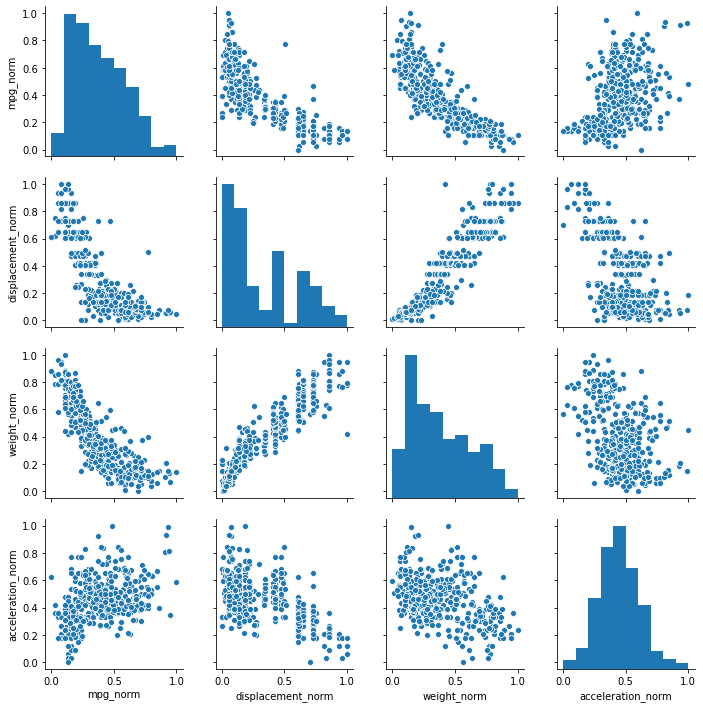

In [13]:
sns.pairplot(auto[num_cols_norm]);

Here's the same example, but using Z-normalization.

In [16]:
znorm_scaler = StandardScaler()
znorm_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(znorm_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()
auto[num_cols_norm].describe()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.761610e-16,-8.312725e-17,-9.902743e-17,8.982206e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.204411e+00,-1.604943e+00,-2.747814e+00
25%,-7.704907e-01,-8.563178e-01,-8.828266e-01,-6.328794e-01
50%,-6.591883e-02,-4.314040e-01,-1.973624e-01,-2.472221e-02
75%,7.027050e-01,6.584879e-01,7.538337e-01,5.834349e-01
max,2.957335e+00,2.511784e+00,2.565185e+00,3.351912e+00


A way to augment data is based on looking at other datasets to take a look into other issues

A toy is releasing in 2 weeks and they want to see if it will be profitable in 2 years??? Look at category (if for boys 5 - 10 years) - make it easier to categorize and build based on other models and merge

Let's look at the scatter plot matirx for the normalized features.

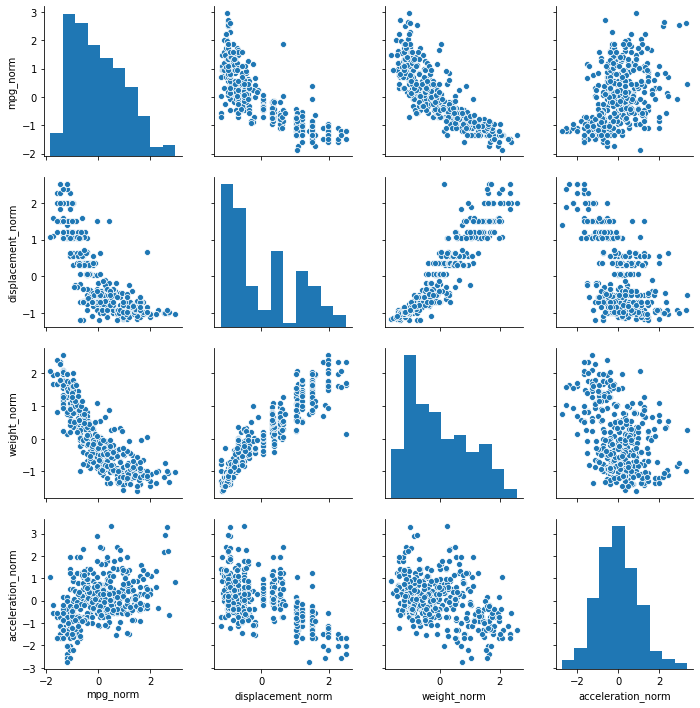

In [17]:
sns.pairplot(auto[num_cols_norm]);

In either case, it doesn't look like normalization changed anything to the scatter plot matrix. Do you notice what changed? The answer is that the **range of the data** is what changed. Just check the $x$ and $y$ axes and you'll see. Normalization is not really supposed to change the distribution of the data, just put all features on the same scale.

Let's look one last time at the code for normalizing the data using `sklearn`.

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

There's two things we need to point out about the code above:

In the third line, notice how we used `pd.DataFrame` to turn the data into a `DataFrame` object. This is because `sklearn` returns a `numpy` array instead of a `DataFrame`. As we saw earlier, the distinction is most of the time unimportant since a `DataFrame` is just a sort of wrapper for a `numpy` array, but if we want to use `DataFrame` methods like `head` to examine the results, we need to convert the data like we did.

You might be curious why we use `fit` followed by `transform`. What exactly happens when we run `fit`? Why should those two steps not be a single step? Here's a short answer using `MinMaxScaler` as our example:
  - When we run `fit` we find the min and max for the columns and rememeber it.
  - When we run `transform` we apply the transformation using the min and max we found when we ran `fit`.

This means that we can learn the min and max once, and then apply the **same** transformation (with the same min and max) not just to the original data, but any future data. In machine learning, this has important consequences, but that's the topic of a future lecture.

# Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in the previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [1]:
import pandas as pd
import seaborn as sns
col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../Data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


As we learned in the lab, some pre-processing steps are straight-forward, while others may require some work. Pre-process the data using the steps outlined below. Create a new data called `churn_processed` which stores only the pre-processed as you run through each of the these steps. You will need to make sure your columns are properly named.

1. Remove `gender` and `store_id` from the data. <span style="color:red" float:right>[1 point]</span>

Reasoning - To remove any columns within a panda dataframe I will use the .drop() call and just add in the columns I wish to get rid of, can either make a list or reference them directly, will reference them directly in the code below. Also want to take an initial look at the data just to make sure I know what is ahead

In [2]:
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

In [3]:
churn.isnull().any(axis=0)

user_id      False
gender       False
address      False
store_id     False
trans_id     False
timestamp    False
item_id      False
quantity     False
dollar       False
dtype: bool

In [5]:
churn_processed = churn.drop(columns=['gender', 'store_id'])
churn_processed.columns

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar'],
      dtype='object')

Conclusion - By using the drop() call I was able to successfully drop the 'gender' and 'store_id' columns, double checked by using the 'head()' call and it confirmed, could also use the 'column' call as well

2. Convert `timestamp` into a `datetime` column and extract two new columns: `dow` is the day of the week and `month` is the month of the year. <span style="color:red" float:right>[2 point]</span>

Reasoning - To get the timestamp into a datetime column, I will call the pd.to_datetime() and pass the timestamp column. To extract the dow and month - I will also use a panda option and do the dt.day_name and dt.month_name to get the columns in categorical type

In [6]:
churn_processed['timestamp'] = pd.to_datetime(churn_processed['timestamp'])
churn_processed['dow']=churn_processed['timestamp'].dt.day_name()
churn_processed['month']=churn_processed['timestamp'].dt.month_name()
print(churn_processed.columns)
print(churn_processed.dtypes)

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar', 'dow', 'month'],
      dtype='object')
user_id               int64
address              object
trans_id              int64
timestamp    datetime64[ns]
item_id             float64
quantity              int64
dollar                int64
dow                  object
month                object
dtype: object


In [7]:
churn_processed.head()

,user_id,address,trans_id,timestamp,item_id,quantity,dollar,dow,month
0,101981,E,818463,2000-11-01,4.710000e+12,1,37,Wednesday,November
1,101981,E,818464,2000-11-01,4.710000e+12,1,17,Wednesday,November
2,101981,E,818465,2000-11-01,4.710000e+12,1,23,Wednesday,November
3,101981,E,818466,2000-11-01,4.710000e+12,1,41,Wednesday,November
4,101981,E,818467,2000-11-01,4.710000e+12,8,288,Wednesday,November


Conclusion - Everything worked as planned, was able to get the timestamp column in datetime and add two new columns that are the dow and month in object dtype

3. One-hot encode `address`, `dow` and `month`. <span style="color:red" float:right>[1 point]</span>

Reasoning - Use the same call as the previous weeks HW - I dont think I will do the scikit dummy option, will stick to pandas due to simplicity

In [41]:
churn_processed.columns

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar', 'dow', 'month'],
      dtype='object')

In [42]:
churn_dummy = pd.get_dummies(churn_processed[['address', 'dow', 'month']], prefix=['address', 'dow', 'month'],dtype=int) #Running a onehotencode

churn_dummy.columns

Index(['address_A', 'address_B', 'address_C', 'address_D', 'address_E',
       'address_F', 'address_G', 'address_H', 'dow_Friday', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'month_December', 'month_November'],
      dtype='object')

Conclusion - Able to ohe the columns and then add the quantity, dollar, user_id and item_id back in

4. Rescale `dollar` using min-max normalization. Use `pandas` to do it and call the rescaled column `dollar_std_minmax`. <span style="color:red" float:right>[1 point]</span>

Reasoning - To get the std minmax I will take the value, subtract from the mean and then divide by the std - need to make a new column that passes those values through

In [43]:
churn_processed['Dollar_std_minmax'] = (churn_processed['dollar'] - churn_processed['dollar'].min()) / (churn_processed['dollar'].max() - churn_processed['dollar'].min())#passing in the value, subtract it from the mean, and then divide by std
print(churn_processed['Dollar_std_minmax'].describe()) #Examining the results

count    92587.000000
mean         0.001983
std          0.005741
min          0.000000
25%          0.000574
50%          0.001133
75%          0.001994
max          1.000000
Name: Dollar_std_minmax, dtype: float64


Conclusion - Able to get the min_max column all set up by using the calculation above

You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that are not affected by outliers. For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not. 

5. Write briefly about what makes robust normalization different from Z-normalization then rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust`. <span style="color:red" float:right>[3 point]</span>

The robust normalization removes the median and scales teh data according to the quantile range (defaults to IQR). Range between the 1rst quantile and the 3rd quantile - centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set - median and IQR are stored to be used later on. If there is alot of outliers it is better to use the robust normalization

Reasoning - Will need to import the RobustScaler model from sklearn library and then transform the quantity

In [44]:
from sklearn.preprocessing import RobustScaler

churn_processed['qty_std_robust'] = RobustScaler().fit_transform(churn_processed[['quantity']])

print(churn_processed[['quantity', 'qty_std_robust']].describe())

           quantity  qty_std_robust
count  92587.000000    92587.000000
mean       1.412434        0.412434
std        5.852498        5.852498
min        1.000000        0.000000
25%        1.000000        0.000000
50%        1.000000        0.000000
75%        1.000000        0.000000
max     1200.000000     1199.000000


###Another way to write it below

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

churn_dummy['qty_std_robust']=robust_scaler.fit_transform(churn_dummy[['Quantity']])

#print(churn_dummy.columns)
print(churn_dummy[['Quantity','qty_std_robust']].describe())

In [45]:
churn_processed.columns

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar', 'dow', 'month', 'Dollar_std_minmax', 'qty_std_robust'],
      dtype='object')

Conclusion - Was able to successfully get the new column updated

6. Rescale `quantity` a second time, using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Briefly describe why and when you think this kind of normalization makes sense. <span style="color:red" float:right>[3 point]</span>

Reasoning - By using the z-score normalization, you can transform the data into a distribution with a mean of 0 and a std of 1 - will be able to do the z-score normalization by using the scipy stats zscore and then passing through the groupby call with the user_id based on quantity and then transforming the data 

In [46]:
###Please leave, extra help for me
#churn_mean_qty = churn_dummy.groupby(['user_id']).Quantity.transform('mean')
#churn_mean_std = churn_dummy.groupby(['user_id']).Quantity.transform('std')

In [47]:
churn_processed.columns

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar', 'dow', 'month', 'Dollar_std_minmax', 'qty_std_robust'],
      dtype='object')

In [48]:
from scipy.stats import zscore

churn_processed['qty_std_Z_byuser']=churn_processed.groupby(['user_id']).quantity.transform(lambda x : zscore(x, ddof=1))###Look into the zscore and ddof=1 call

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [49]:
churn_processed['qty_std_Z_byuser'].describe()

count    8.544500e+04
mean     1.663158e-19
std      9.719872e-01
min     -2.474874e+00
25%     -4.595434e-01
50%     -3.535534e-01
75%     -2.182179e-01
max      1.348451e+01
Name: qty_std_Z_byuser, dtype: float64

In [51]:
churn_processed.columns

Index(['user_id', 'address', 'trans_id', 'timestamp', 'item_id', 'quantity',
       'dollar', 'dow', 'month', 'Dollar_std_minmax', 'qty_std_robust',
       'qty_std_Z_byuser'],
      dtype='object')

Conclusion - was able to get the Z-normalization score based off of grouping the user_id by quantity and created a new column, the mean is as close to 0 as possible and the std is just about 1 as well so it seems to have worked on that end

7. Convert `item_id` into a `category` column, then replace the `item_id` of all the items sold only once in the entire data with `999999`. <span style="color:red" float:right>[1 point]</span>

Reasoning - Can simply change the type of the column by using the .astype() call and then will replace the values of 1 with a 999999 by using the replace() call

In [52]:
churn_processed['item_id']=churn_processed['item_id'].astype('category')

###Can also groupby

##Also look into loc

In [58]:
churn_processed['quantity'].replace({1:999999},inplace=True)
churn_processed['quantity']==999999

churn_processed['quantity'].unique()

array([999999,      8,      2,      4,      3,      6,      5,     20,
           24,     10,     12,     15,      7,     22,     18,     29,
           23,     39,      9,     13,     17,     14,     33,     11,
           36,     16,     60,     21,     48,     72,    852,     30,
           27,     19,    200,    720,    150,     96,     25,     31,
           37,    479,   1200,     44])

Conclusion - Being able to change the column type to category was straight forward and then was able to get all of the values of 1 replaced with 999999

8. Display the first few rows of your data. <span style="color:red" float:right>[1 point]</span>

Reasoning - Will be able to display the dataframe by using the .head() call to investigate all of the columns and to take a look at the data

In [59]:
churn_processed.head()

,user_id,address,trans_id,timestamp,item_id,quantity,dollar,dow,month,Dollar_std_minmax,qty_std_robust,qty_std_Z_byuser
0,101981,E,818463,2000-11-01,4.710000e+12,999999,37,Wednesday,November,0.000526,0.0,-0.498909
1,101981,E,818464,2000-11-01,4.710000e+12,999999,17,Wednesday,November,0.000207,0.0,-0.498909
2,101981,E,818465,2000-11-01,4.710000e+12,999999,23,Wednesday,November,0.000303,0.0,-0.498909
3,101981,E,818466,2000-11-01,4.710000e+12,999999,41,Wednesday,November,0.000590,0.0,-0.498909
4,101981,E,818467,2000-11-01,4.710000e+12,8,288,Wednesday,November,0.004531,7.0,6.757944


Conclusion - Can see a few new columns that were created as the assignment went on - Dollar_std_minmax, qty_std_robust, etc...

# End of assignment